#### Cosine Uniform Distribution


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [28]:
# Reproducibility (optional)
# np.random.seed(42)

# Grid and sample sizes
ngrid = 200
nsample = 10_000

In [34]:
# (a) Compute the PDF for X = cos(U), where U ~ Uniform(-pi/2, pi/2)
# X ∈ [0, 1], with f_X(x) = 2 / (pi * sqrt(1 - x^2))
x_edges = np.linspace(0.0, 1.0, ngrid + 1)                    # bin edges on [0, 1]
x_centres = 0.5 * (x_edges[:-1] + x_edges[1:])                # bin centres
f_theory_x = 2.0 / (np.pi * np.sqrt(1.0 - np.clip(x_centres, 0, 1 - 1e-12)**2))

print(x_centres[:10])
print(f_theory_x[:10])

[0.0025 0.0075 0.0125 0.0175 0.0225 0.0275 0.0325 0.0375 0.0425 0.0475]
[0.63662176 0.63663768 0.63666951 0.63671728 0.63678098 0.63686063
 0.63695625 0.63706787 0.6371955  0.63733918]


In [43]:
# (b) Sample U and X
U = np.random.uniform(-np.pi/2, np.pi/2, size=nsample)        # U ~ Uniform(-pi/2, pi/2)
X = np.cos(U)

print(U[:10])
print(X[:10])

[-0.67352036  1.37669528 -0.59951124 -0.14992194  0.17313572  0.5035285
  0.08324497  1.356356    0.74354959  1.53869913]
[0.78163072 0.19288454 0.82561149 0.98878274 0.98504941 0.87588545
 0.99653714 0.2128006  0.73607046 0.03209169]


In [44]:
# Histogram estimates as densities (area under histogram equals 1)
y_edges = np.linspace(-np.pi/2, np.pi/2, ngrid + 1)           # bin edges on [-pi/2, pi/2]
y_centres = 0.5 * (y_edges[:-1] + y_edges[1:])

print(y_centres[:10])

hu, _ = np.histogram(U, bins=y_edges, density=True)
hx, _ = np.histogram(X, bins=x_edges, density=True)

print(hu[:10])
print(hx[:10])

[-1.56294235 -1.54723438 -1.53152642 -1.51581846 -1.50011049 -1.48440253
 -1.46869457 -1.4529866  -1.43727864 -1.42157068]
[0.2801127  0.29921129 0.29921129 0.30557749 0.33740848 0.2928451
 0.39470426 0.26101411 0.32467608 0.34377468]
[0.76 0.48 0.42 0.64 0.52 0.46 0.84 0.62 0.48 0.52]


In [45]:
# Theoretical PDF for U on its support is 1/pi
f_theory_u = np.full_like(y_centres, 1.0 / np.pi, dtype=float)

print(f_theory_u[:10])

[0.31830989 0.31830989 0.31830989 0.31830989 0.31830989 0.31830989
 0.31830989 0.31830989 0.31830989 0.31830989]


Text(0.5, 1.0, 'Distribution of U')

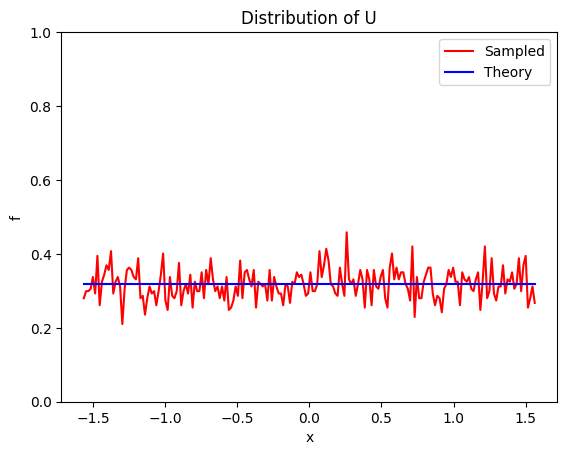

In [47]:
# Plot the PDF of U
plt.figure(1)
plt.plot(y_centres, hu, 'r', label='Sampled')
plt.plot(y_centres, f_theory_u, 'b', label='Theory')
plt.ylim([0, 1])
plt.xlabel('x')
plt.ylabel('f')
plt.legend()
plt.title('Distribution of U')

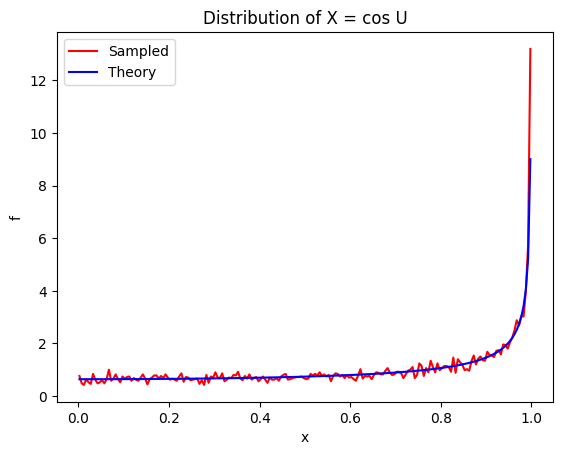

In [48]:
# Plot the PDF of X
plt.figure(2)
plt.plot(x_centres, hx, 'r', label='Sampled')
plt.plot(x_centres, f_theory_x, 'b', label='Theory')
plt.xlabel('x')
plt.ylabel('f')
plt.legend()
plt.title('Distribution of X = cos U')

plt.show()